# prepare data

In [1]:
!git clone https://github.com/rsethi21/foldingML.git

Cloning into 'foldingML'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 241 (delta 119), reused 186 (delta 71), pack-reused 0
Receiving objects: 100% (241/241), 1.43 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [36]:
import argparse
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

In [37]:
def access(fp, typ):

    if typ.lower() == "csv":

        with open(fp, "r") as file:
            return pd.read_csv(file)

    elif typ.lower() == "json":

        with open(fp, "r") as file:
            return json.load(file)

    else:

        print("Unknown file type. Must be one of the following options: csv, or json.")

In [38]:
original_coordinates = access("./foldingML/data/traj3COM.csv", "csv")

In [39]:
original_coordinates.drop(columns=["Unnamed: 0"])

,0,1,2
0,304.921246,51.195330,321.586521
1,160.483568,44.230332,195.581353
2,94.910504,315.017926,299.773951
3,284.418336,272.132971,121.530516
4,39.794761,111.333904,170.314841
...,...,...,...
195,19.622772,199.683168,54.371782
196,20.393564,201.333663,65.960891
197,23.617822,199.337624,90.648020
198,22.356436,200.801485,107.290099


In [40]:
original_coordinates = MinMaxScaler().fit_transform(original_coordinates)

In [41]:
condition = "pH 7 URQCH"

# unclustered data

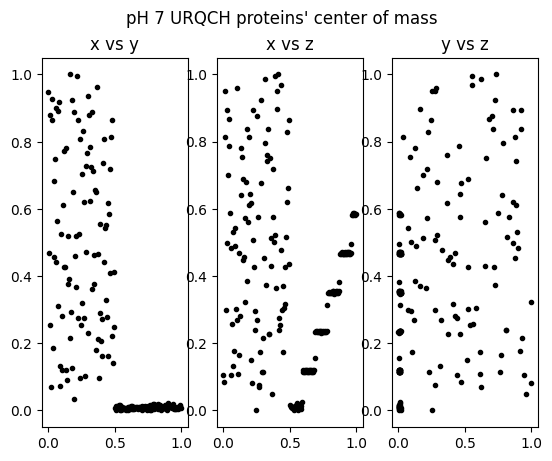

In [42]:
original_fig, axs = plt.subplots(ncols=3)
original_fig.suptitle(f"{condition} proteins' center of mass")

titles = ["x vs y", "x vs z", "y vs z"]
indices = [[0, 1], [0, 2], [1, 2]]

for i, ax in enumerate(axs):
  ax.plot(original_coordinates[:,indices[i][0]], original_coordinates[:,indices[i][1]], "k.")
  ax.set_title(titles[i])

# DBSCAN

In [ ]:
db = DBSCAN(eps=0.145, min_samples=2)
db.fit(original_coordinates)
predicted_clusters = db.fit_predict(original_coordinates)

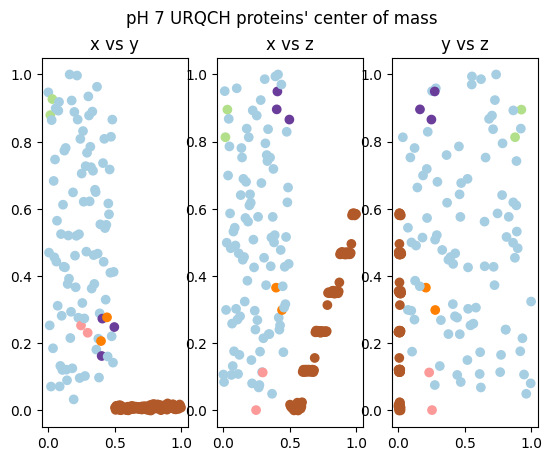

In [71]:
clustered_fig, clustered_axs = plt.subplots(ncols=3)
clustered_fig.suptitle(f"{condition} proteins' center of mass")

titles = ["x vs y", "x vs z", "y vs z"]
indices = [[0, 1], [0, 2], [1, 2]]

for clust_i, clust_ax in enumerate(clustered_axs):
  clust_ax.scatter(original_coordinates[:,indices[clust_i][0]], original_coordinates[:,indices[clust_i][1]], c=predicted_clusters, cmap='Paired')
  clust_ax.set_title(titles[clust_i])

# hierarchical clustering

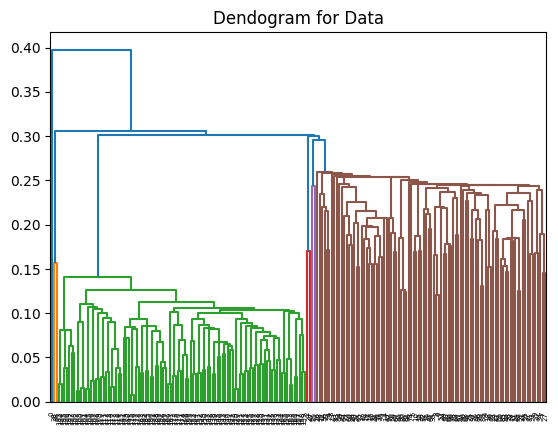

In [89]:
dendo = plt.figure()
plt.title("Dendogram for Data")
dictionary = hierarchy.dendrogram(hierarchy.linkage(original_coordinates, method="single"))

In [90]:
clustered_dictionary = {}

for leaf, cluster in zip(dictionary["leaves"], dictionary["leaves_color_list"]):
  clustered_dictionary[leaf] = int(cluster[-1])

sorted_dictionary = {key: clustered_dictionary[key] for key in sorted(list(clustered_dictionary.keys()))}

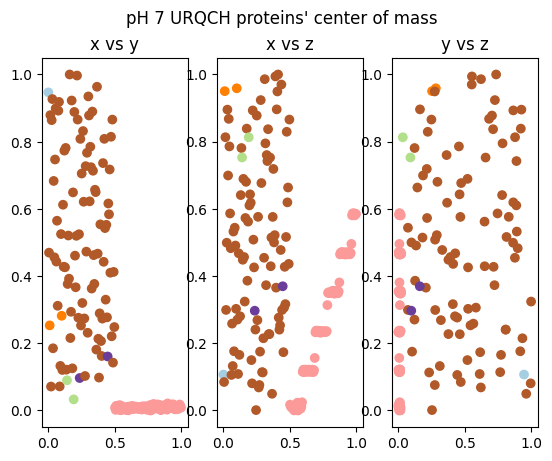

In [91]:
clustered_fig2, clustered_axs2 = plt.subplots(ncols=3)
clustered_fig2.suptitle(f"{condition} proteins' center of mass")

titles = ["x vs y", "x vs z", "y vs z"]
indices = [[0, 1], [0, 2], [1, 2]]

for clust_i2, clust_ax2 in enumerate(clustered_axs2):
  clust_ax2.scatter(original_coordinates[:,indices[clust_i2][0]], original_coordinates[:,indices[clust_i2][1]], c=list(sorted_dictionary.values()), cmap='Paired')
  clust_ax2.set_title(titles[clust_i2])